# City Analysis

# Import Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [6]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Dataset .csv")   
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Check Columns

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
df.rename(columns={'Aggregate rating':'Rating'}, inplace=True)

df = df.dropna(subset=['City','Rating'])

# Data Cleaning

In [10]:
city_counts = df['City'].value_counts()

top_city = city_counts.idxmax()
top_count = city_counts.max()

print("City with highest restaurants:", top_city)
print("Count:", top_count)

City with highest restaurants: New Delhi
Count: 5473


In [11]:
city_counts = df['City'].value_counts()
print(city_counts)

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64


In [12]:
df = df.dropna(subset=['City','Rating'])

city_counts = df['City'].value_counts()

top_city = city_counts.idxmax()
top_count = city_counts.max()

print("City with highest restaurants:", top_city)
print("Count:", top_count)


city_avg = df.groupby('City')['Rating'].mean()

print(city_avg)

best_city = city_avg.idxmax()
best_rating = city_avg.max()

print("Highest average rating city:", best_city)
print("Average rating:", best_rating)

City with highest restaurants: New Delhi
Count: 5473
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Rating, Length: 141, dtype: float64
Highest average rating city: Inner City
Average rating: 4.9


In [13]:
rating_col = [col for col in df.columns if 'rating' in col.lower()][0]

df.rename(columns={rating_col:'Rating'}, inplace=True)

df = df.dropna(subset=['City','Rating'])

print(df['City'].value_counts().idxmax())

city_avg = df.groupby('City')['Rating'].mean()

print(city_avg.idxmax(), city_avg.max())

New Delhi
Inner City 4.9


In [14]:
city_avg_rating = df.groupby('City')['Rating'].mean()

In [15]:
best_city = city_avg_rating.idxmax()
best_rating = city_avg_rating.max()

print("City with highest average rating:", best_city)
print("Average rating:", best_rating)

City with highest average rating: Inner City
Average rating: 4.9


In [16]:
city_avg_rating.sort_values(ascending=False).head(10)

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Tagaytay City       4.500000
Secunderabad        4.500000
Name: Rating, dtype: float64

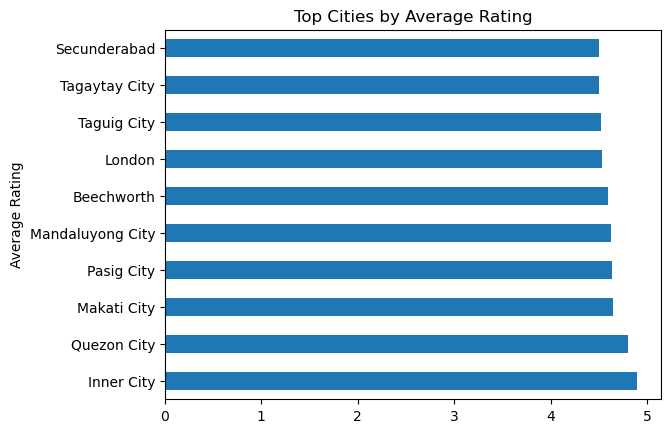

In [25]:
import matplotlib.pyplot as plt
city_avg_rating.sort_values(ascending=False).head(10).plot(kind='barh')

plt.title("Top Cities by Average Rating")
plt.ylabel("Average Rating")
plt.show()